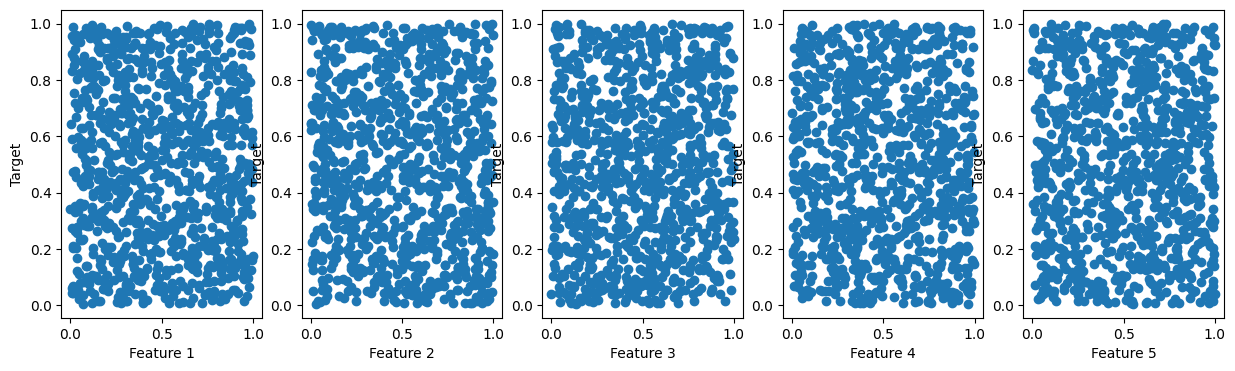

In [32]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)


num_samples = 1000
num_features = 5

X = np.random.rand(num_samples, num_features)


y = np.random.rand(num_samples)


fig, axs = plt.subplots(1, num_features, figsize=(15, 4))

for i in range(num_features):
    axs[i].scatter(X[:, i], y)
    axs[i].set_xlabel(f'Feature {i+1}')
    axs[i].set_ylabel('Target')

   
    m, b = np.polyfit(X[:, i], y, 1)
    line_x = np.array([X[:, i].min(), X[:, i].max()])
    line_y = m * line_x

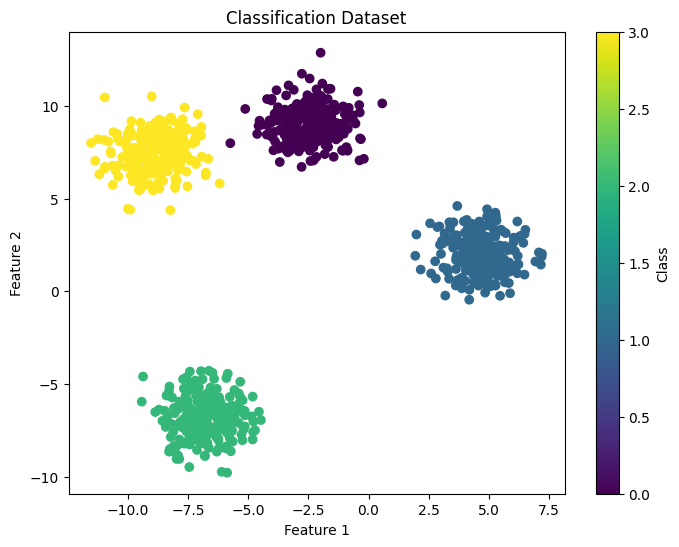

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

np.random.seed(42)

num_samples = 1000
num_features = 2
num_classes = 2
clusters_per_class = 2

X, y = make_blobs(n_samples=num_samples, n_features=num_features, centers=num_classes*clusters_per_class,
                  cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Dataset')
plt.colorbar(label='Class')
plt.show()

In [29]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = 'https://www.worldometers.info/coronavirus/'
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find('table', {'id': 'main_table_countries_today'})


headers = []
for th in table.find_all('th'):
    headers.append(th.text.strip())

rows = []
for tr in table.find_all('tr'):
    row = []
    for td in tr.find_all('td'):
        row.append(td.text.strip())
    if row:
        rows.append(row)

df = pd.DataFrame(rows, columns=headers)

columns_to_keep = ['Country,Other', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths',
                   'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases']
df = df[columns_to_keep]

print(df)

     Country,Other          Continent Population   TotalCases NewCases  \
0    North America      North America             126,649,484     +125   
1             Asia               Asia             217,322,003  +21,394   
2           Europe             Europe             249,252,989            
3    South America      South America              68,674,162            
4          Oceania  Australia/Oceania              14,323,648            
..             ...                ...        ...          ...      ...   
242         Total:      South America              68,674,162            
243         Total:  Australia/Oceania              14,323,648            
244         Total:             Africa              12,823,265            
245         Total:                                        721            
246         Total:                All             689,046,272  +21,519   

    TotalDeaths NewDeaths TotalRecovered NewRecovered ActiveCases  
0     1,632,558        +8    122,498,724   

Original class distribution:
Counter({0: 950, 1: 50})


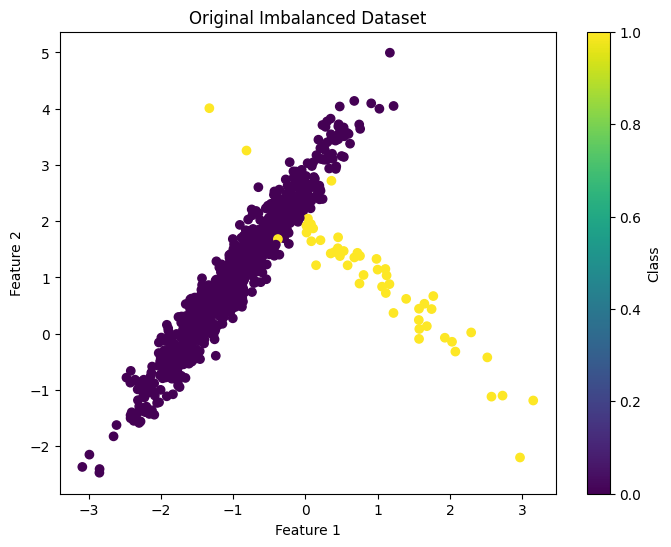

Class distribution after SMOTE oversampling:
Counter({0: 950, 1: 237})


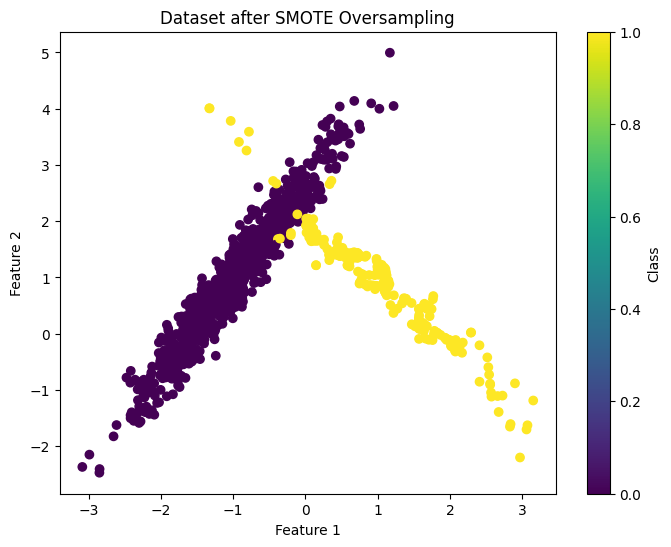

Class distribution after RandomUnderSampler undersampling:
Counter({0: 950, 1: 237})


<function matplotlib.pyplot.show(close=None, block=None)>

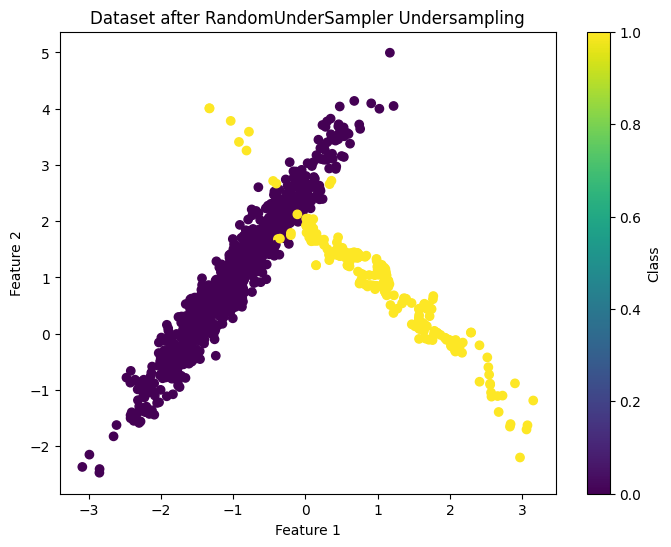

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

np.random.seed(42)

num_samples = 1000
num_features = 2
num_classes = 2
cluster_per_class = 1

X, y = make_classification(n_samples=num_samples, n_features=num_features, n_informative=num_features,
                           n_redundant=0, n_clusters_per_class=cluster_per_class,
                           weights=[0.95, 0.05], flip_y=0, random_state=42)

print("Original class distribution:")
print(Counter(y))

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Imbalanced Dataset')
plt.colorbar(label='Class')
plt.show()

oversampler = SMOTE(sampling_strategy=0.25, random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

print("Class distribution after SMOTE oversampling:")
print(Counter(y_resampled))

plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset after SMOTE Oversampling')
plt.colorbar(label='Class')
plt.show()

print("Class distribution after RandomUnderSampler undersampling:")
print(Counter(y_resampled))

plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset after RandomUnderSampler Undersampling')
plt.colorbar(label='Class')
plt.show

In [26]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_iris()

X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)

print("First 5 rows of the DataFrame:")
print(df.head())

print("Missing values in the DataFrame:")
print(df.isnull().sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set dimensions:", X_train.shape)
print("Testing set dimensions:", X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

df_train_scaled = pd.DataFrame(X_train_scaled, columns=data.feature_names)
print("First 5 rows of the standardized training set:")
print(df_train_scaled.head())

First 5 rows of the DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Missing values in the DataFrame:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
Training set dimensions: (105, 4)
Testing set dimensions: (45, 4)
First 5 rows of the standardized training set:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.413416         -1.462003          -0.099511         -0.323398
1           0.551222         -0.502563           0.717703          0.353032
2           0.671802          0.21